In [299]:
# Import necessary libraries for data manipulation and analysis

import joblib
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [300]:
df  = pd.read_csv('updated_student_performance.csv')

In [301]:
df.drop('gpa', axis=1, inplace=True)

In [302]:
df .head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades,previous_gpa,average_gpa
0,22.0,F,College,50000.00,A,81.0,Medium,8.0,Law,Private,...,No,Visual,Yes,NaN,Low,2.0,NaN,B,4.0,3.5
1,21.0,M,NaN,60000.00,A,NaN,Medium,12.0,Law,Public,...,No,Auditory,Yes,Yes,Medium,5.0,High,NaN,4.0,4.0
2,19.0,M,College,75000.00,C,93.0,Medium,12.0,Law,Private,...,Yes,NaN,No,No,Low,2.0,High,A,2.0,3.0
3,21.0,M,College,60000.00,A,86.0,Low,15.0,Business,Public,...,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C,4.0,3.0
4,19.0,NaN,NaN,40000.00,NaN,89.0,High,15.0,Medicine,NaN,...,No,Auditory,Yes,NaN,Medium,3.0,High,B,NaN,3.0


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          9099 non-null   float64
 1   Gender                       9085 non-null   object 
 2   Parental_Education           9102 non-null   object 
 3   Family_Income                9097 non-null   object 
 4   Previous_Grades              9120 non-null   object 
 5   Attendance                   9060 non-null   float64
 6   Class_Participation          9098 non-null   object 
 7   Study_Hours                  9073 non-null   float64
 8   Major                        9136 non-null   object 
 9   School_Type                  9115 non-null   object 
 10  Financial_Status             9129 non-null   object 
 11  Parental_Involvement         9118 non-null   object 
 12  Educational_Resources        9129 non-null   object 
 13  Motivation      

In [304]:
df['Family_Income'] = pd.to_numeric(df['Family_Income'], errors='coerce')

In [305]:
df

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades,previous_gpa,average_gpa
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,No,Visual,Yes,NaN,Low,2.0,NaN,B,4.0,3.5
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,No,Auditory,Yes,Yes,Medium,5.0,High,NaN,4.0,4.0
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Yes,NaN,No,No,Low,2.0,High,A,2.0,3.0
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C,4.0,3.0
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,No,Auditory,Yes,NaN,Medium,3.0,High,B,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,20.0,NaN,Some College,75000.0,A,78.0,NaN,16.0,Law,Private,...,Yes,Auditory,No,No,Medium,3.0,Low,B,4.0,3.5
10060,19.0,M,College,NaN,B,NaN,Medium,5.0,Science,Public,...,Yes,Visual,Yes,No,Low,4.0,High,A,3.0,3.5
10061,20.0,M,NaN,30000.0,B,97.0,Medium,7.0,Engineering,Public,...,Yes,Kinesthetic,No,No,High,3.0,High,A,3.0,3.5
10062,21.0,F,College,50000.0,B,75.0,Medium,15.0,NaN,Public,...,No,Kinesthetic,Yes,Yes,Low,4.0,Medium,A,3.0,3.5


In [306]:
numeric_cols = df.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])


obj_imputer = SimpleImputer(strategy='most_frequent')
df[df.select_dtypes(include='object').columns] = obj_imputer.fit_transform\
        (df[df.select_dtypes
    (include='object').columns])

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10064 non-null  float64
 1   Gender                       10064 non-null  object 
 2   Parental_Education           10064 non-null  object 
 3   Family_Income                10064 non-null  float64
 4   Previous_Grades              10064 non-null  object 
 5   Attendance                   10064 non-null  float64
 6   Class_Participation          10064 non-null  object 
 7   Study_Hours                  10064 non-null  float64
 8   Major                        10064 non-null  object 
 9   School_Type                  10064 non-null  object 
 10  Financial_Status             10064 non-null  object 
 11  Parental_Involvement         10064 non-null  object 
 12  Educational_Resources        10064 non-null  object 
 13  Motivation      

In [308]:
label_encoder = LabelEncoder()

In [309]:
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [310]:
# Save label encoders
joblib.dump(label_encoder, 'label_encoders.pkl')

['label_encoders.pkl']

In [311]:
df

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades,previous_gpa,average_gpa
0,22.0,0,0,50000.0,0,81.0,2,8.0,3,0,...,0,2,1,1,1,2.0,1,1,4.0,3.5
1,21.0,1,3,60000.0,0,85.0,2,12.0,3,1,...,0,0,1,1,2,5.0,0,1,4.0,4.0
2,19.0,1,0,75000.0,2,93.0,2,12.0,3,0,...,1,2,0,0,1,2.0,0,0,2.0,3.0
3,21.0,1,0,60000.0,0,86.0,1,15.0,1,1,...,1,0,1,1,1,3.0,2,2,4.0,3.0
4,19.0,0,3,40000.0,2,89.0,0,15.0,4,1,...,0,0,1,1,2,3.0,0,1,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,20.0,0,3,75000.0,0,78.0,2,16.0,3,0,...,1,0,0,0,2,3.0,1,1,4.0,3.5
10060,19.0,1,0,50000.0,1,85.0,2,5.0,5,1,...,1,2,1,0,1,4.0,0,0,3.0,3.5
10061,20.0,1,3,30000.0,1,97.0,2,7.0,2,1,...,1,1,0,0,0,3.0,0,0,3.0,3.5
10062,21.0,0,0,50000.0,1,75.0,2,15.0,1,1,...,0,1,1,1,1,4.0,2,0,3.0,3.5


In [312]:
# Splitting the data into features and target
X = df.drop(columns=['average_gpa'])
y = df['average_gpa']

In [313]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [314]:
# Initializing and training the linear regression model
l = LinearRegression()
l.fit(X_train, y_train)

LinearRegression()

In [315]:
# Making predictions on the test set
y_pred = l.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.3f}')

Mean Squared Error: 0.0279
R-squared: 0.929


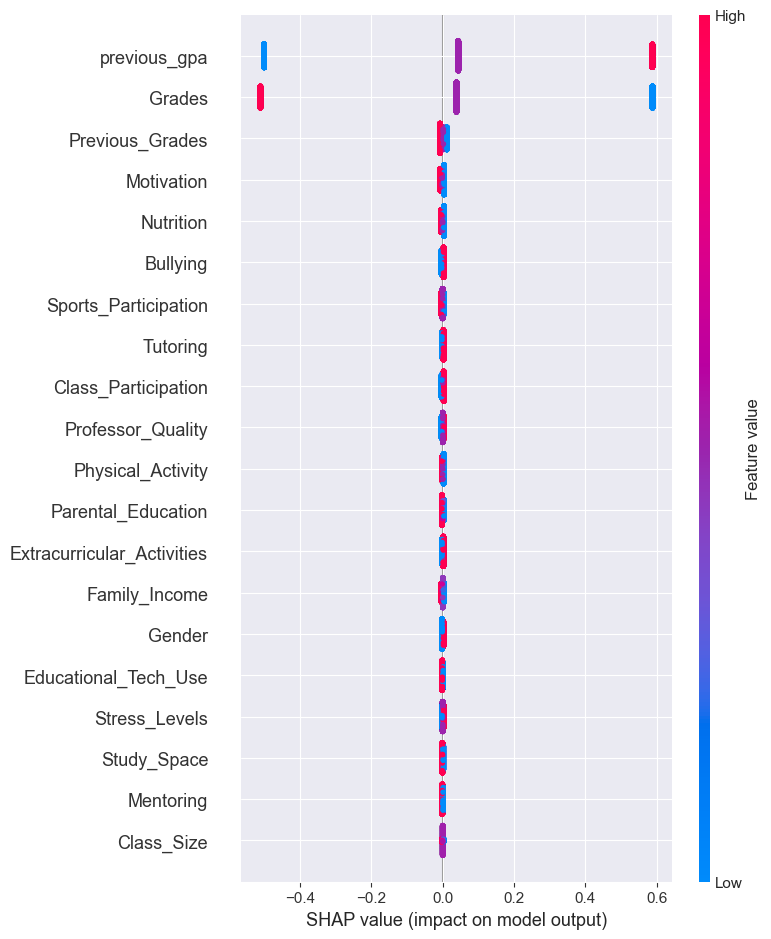

In [316]:
import shap

explainer = shap.Explainer(l, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

In [317]:
top_features = ['previous_gpa','Grades', 'Previous_Grades', 'Motivation','Nutrition', 'Bullying', 
                'Sports_Participation', 'Tutoring',
       'Class_Participation', 'Professor_Quality', 'Physical_Activity',
       'Parental_Education', 'Extracurricular_Activities', 'Family_Income','Gender', 'Educational_Tech_Use', 
                'Stress_Levels', 
                'Study_Space', 'Mentoring', 'Class_Size']


filtered_df = df[top_features]
filtered_df['average_gpa'] = y

C:\Users\mcnob\AppData\Local\Temp\ipykernel_17496\2489921506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['average_gpa'] = y


In [318]:
filtered_df.head()

,previous_gpa,Grades,Previous_Grades,Motivation,Nutrition,Bullying,Sports_Participation,Tutoring,Class_Participation,Professor_Quality,...,Parental_Education,Extracurricular_Activities,Family_Income,Gender,Educational_Tech_Use,Stress_Levels,Study_Space,Mentoring,Class_Size,average_gpa
0,4.0,1,0,2,2,1,1,1,2,2,...,0,1,50000.0,0,1,0,0,1,39.0,3.5
1,4.0,1,0,0,1,0,0,1,2,0,...,3,1,60000.0,1,0,1,0,1,75.0,4.0
2,2.0,0,2,1,2,0,0,0,2,2,...,0,0,75000.0,1,0,0,1,0,46.0,3.0
3,4.0,2,0,0,0,0,2,1,1,0,...,0,1,60000.0,1,1,2,1,1,61.0,3.0
4,3.0,1,2,0,2,0,0,1,0,1,...,3,1,40000.0,0,1,0,0,1,41.0,3.0


In [319]:
# Splitting the data into features and target
X = filtered_df.drop(columns=['average_gpa'])
y = filtered_df['average_gpa']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [320]:
# Polynomial Regression

# Create polynomial regression pipelines with degree 1 and 2
poly_pipeline1 = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
poly_pipeline2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Transform the training and test data to include polynomial features (degree 1)
poly1 = PolynomialFeatures(degree=1)
X_poly_train = poly1.fit_transform(X_train)
X_poly_test = poly1.fit_transform(X_test)

# Initialize and fit a Linear Regression model on the polynomial transformed data
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict the target values on the polynomial transformed test data
y_pred = model.predict(X_poly_test)

In [321]:
# Evaluate the Polynomial Regression model (degree 1) using various metrics

print(f"""
Mean Absolute Error = {mean_absolute_error(y_pred, y_test)},
Mean Squared Error = {mean_squared_error(y_pred, y_test)},
Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred, y_test))},
R2 Score = {r2_score(y_pred, y_test)}
""")


Mean Absolute Error = 0.09517235097121288,
Mean Squared Error = 0.027818470480521787,
Root Mean Squared Error = 0.16678870009842328,
R2 Score = 0.9239725504110872



In [322]:
# Transform the training and test data to include polynomial features (degree 2)

poly2 = PolynomialFeatures(degree=2)
X_poly_train = poly2.fit_transform(X_train)
X_poly_test = poly2.fit_transform(X_test)

# Initialize and fit a Linear Regression model on the polynomial transformed data
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict the target values on the polynomial transformed test data
y_pred = model.predict(X_poly_test)

# Evaluate the Polynomial Regression model (degree 2) using various metrics
print(f"""
Mean Absolute Error = {mean_absolute_error(y_pred, y_test)},
Mean Squared Error = {mean_squared_error(y_pred, y_test)},
Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred, y_test))},
R2 Score = {r2_score(y_pred, y_test)}
""")


Mean Absolute Error = 0.06177041313570099,
Mean Squared Error = 0.014154155997862268,
Root Mean Squared Error = 0.11897124021318038,
R2 Score = 0.9630026650291458



In [323]:
# Regularisation Models

# Ridge Regression

# Initialize Ridge regression mode
model1 = Ridge()

# Fit the model on the training data
model1.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model1.predict(X_test)

# Evaluate the Ridge Regression model using various metrics

print(f"""
Mean Absolute Error = {mean_absolute_error(y_pred,y_test)},
Mean Squared Error = {mean_squared_error(y_pred,y_test)},
Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred,y_test))},
R2 Score = {r2_score(y_pred,y_test)}
""")


Mean Absolute Error = 0.09511805812652824,
Mean Squared Error = 0.027822242996434064,
Root Mean Squared Error = 0.16680000898211625,
R2 Score = 0.9239289936769036



In [324]:
# Lasso Regression

# Initialize Lasso regression model
model2 = Lasso()

# Fit the model on the training data
model2.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model2.predict(X_test)

# Evaluate the Lasso Regression model using various metrics
print(f"""
Mean Absolute Error = {mean_absolute_error(y_pred,y_test)},
Mean Squared Error = {mean_squared_error(y_pred,y_test)},
Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred,y_test))},
R2 Score = {r2_score(y_pred,y_test)}
""")


Mean Absolute Error = 0.4841875711241117,
Mean Squared Error = 0.3934740966560268,
Root Mean Squared Error = 0.6272751363285706,
R2 Score = -14356.09459846078



In [325]:
# ElasticNet Regression

# Initialize ElasticNet regression model
model3 = ElasticNet()

# Fit the model on the training data
model3.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = model3.predict(X_test)

# Evaluate the ElasticNet Regression model using various metrics
print(f"""
Mean Absolute Error = {mean_absolute_error(y_pred,y_test)},
Mean Squared Error = {mean_squared_error(y_pred,y_test)},
Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred,y_test))},
R2 Score = {r2_score(y_pred,y_test)}
""")


Mean Absolute Error = 0.48419705078088315,
Mean Squared Error = 0.3934751171135573,
Root Mean Squared Error = 0.6272759497330958,
R2 Score = -14171.45461423396



In [326]:
# Decision Tree Regression

# Initialize Decision Tree Regressor with max depth of 2000
dtree = DecisionTreeRegressor(max_depth=2000)
# Fit the model on the training data

dtree.fit(X_train, y_train)

# Predict the target values on the test data
y_pred = dtree.predict(X_test)

# Evaluate the Decision Tree Regression model using various metrics
print(f"""
Mean Absolute Error = {mean_absolute_error(y_pred,y_test)},
Mean Squared Error = {mean_squared_error(y_pred,y_test)},
Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred,y_test))},
R2 Score = {r2_score(y_pred,y_test)}
""")


Mean Absolute Error = 0.04868355688027819,
Mean Squared Error = 0.024341778440139097,
Root Mean Squared Error = 0.15601851954219761,
R2 Score = 0.9389190308860261



In [327]:
# Stacking Regressor

# Define base models for stacking
estimators = [
    ('lr', l),
    ('poly1', poly_pipeline1),
    ('poly2', poly_pipeline2),
    ('rm1', model1),
    ('rm2', model2),
    ('rm3', model3),
    ('dt', dtree)
]

# Initialize Stacking Regressor with Decision Tree as final estimator
stacking_model = StackingRegressor(estimators=estimators, final_estimator=DecisionTreeRegressor
(max_depth=10000))

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Predict the target values on the test data using the stacking model
y_pred = stacking_model.predict(X_test)

# Evaluate the Stacking Regressor model using various metrics
print(f"""
Mean Absolute Error = {mean_absolute_error(y_pred,y_test)},
Mean Squared Error = {mean_squared_error(y_pred,y_test)},
Root Mean Squared Error = {np.sqrt(mean_squared_error(y_pred,y_test))},
R2 Score = {r2_score(y_pred,y_test)}
""")


Mean Absolute Error = 0.05191256830601093,
Mean Squared Error = 0.025956284153005466,
Root Mean Squared Error = 0.16110954085033408,
R2 Score = 0.9357614336821243



In [328]:
# Cross-validation scores for the stacking model

cv_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)


# Print the mean and standard deviation of cross-validation scores
print(f"Mean CV Score (Negative MSE): {mean_cv_score}")
print(f"Standard Deviation of CV Scores: {std_cv_score}")

Mean CV Score (Negative MSE): -0.024469293020422483
Standard Deviation of CV Scores: 0.0014262035361986155


In [329]:
# Grid search for hyperparameter tuning of the final estimator in the stacking model

param_grid = {
    'final_estimator__max_depth': [5, 10, 15, 20],
    'final_estimator__min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(stacking_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Best estimator from the grid search
test_model_1 = grid_search.best_estimator_

# Predict the target values on the test data using the best estimator
y_pred_best = test_model_1.predict(X_test)

# Evaluate the best estimator model using various metrics
print(f"Test Model 1 Mean Absolute Error: {mean_absolute_error(y_test, y_pred_best)}")
print(f"Test Model 1 Mean Squared Error: {mean_squared_error(y_test, y_pred_best)}")
print(f"Test Model 1 Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_best))}")
print(f"Test Model 1 R2 Score: {r2_score(y_test, y_pred_best)}")

Test Model 1 Mean Absolute Error: 0.04747706280800365
Test Model 1 Mean Squared Error: 0.011864675237061455
Test Model 1 Root Mean Squared Error: 0.10892509002549162
Test Model 1 R2 Score: 0.9698257621964697


In [330]:
# Refined grid search for hyperparameter tuning of the best estimator

refined_param_grid = {
    'final_estimator__max_depth': [12, 15, 18],
    'final_estimator__min_samples_split': [5, 7, 10]
}

refined_grid_search = GridSearchCV(test_model_1, refined_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the refined grid search on the training data
refined_grid_search.fit(X_train, y_train)

# Best estimator from the refined grid search
test_model_2 = refined_grid_search.best_estimator_

# Fit the model on the training data
test_model_2.fit(X_train, y_train)

# Predict the target values on the test data using the model
y_pred_final = test_model_2.predict(X_test)

# Evaluate the model using various metrics
print(f"Test Model 2 Mean Absolute Error: {mean_absolute_error(y_test, y_pred_final)}")
print(f"Test Model 2 Mean Squared Error: {mean_squared_error(y_test, y_pred_final)}")
print(f"Test Model 2 Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_final))}")
print(f"Test Model 2 R2 Score: {r2_score(y_test, y_pred_final)}")

Test Model 2 Mean Absolute Error: 0.04857380020384098
Test Model 2 Mean Squared Error: 0.01544179670442088
Test Model 2 Root Mean Squared Error: 0.12426502607097815
Test Model 2 R2 Score: 0.9607284281648514


In [331]:
# Define refined parameter grid for hyperparameter tuning of the final estimator in the stacking model

refined_param_grid = {
    'final_estimator__max_depth': [10, 15],
    'final_estimator__min_samples_split': [5, 10]
}

# Perform grid search with cross-validation to find the best hyperparameters for the final estimator
refined_grid_search = GridSearchCV(test_model_2, refined_param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search on the training data
refined_grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
test_model_3 = refined_grid_search.best_estimator_

# Fit the best estimator on the training data
test_model_3.fit(X_train, y_train)

# Predict the target values on the test data using the best estimator
y_pred_final = test_model_3.predict(X_test)

# Evaluate the best estimator model using various metrics
print(f"Test Model 3 Mean Absolute Error: {mean_absolute_error(y_test, y_pred_final)}")
print(f"Test Model 3 Mean Squared Error: {mean_squared_error(y_test, y_pred_final)}")
print(f"Test Model 3 Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_final))}")
print(f"Test Model 3 R2 Score: {r2_score(y_test, y_pred_final)}")

Test Model 3 Mean Absolute Error: 0.048454021736757516
Test Model 3 Mean Squared Error: 0.0176414914054966
Test Model 3 Root Mean Squared Error: 0.13282127617778938
Test Model 3 R2 Score: 0.955134165390756


In [332]:
# Initialize and fit XGBoost Regressor with specified parameters

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict the target values on the test data using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model using various metrics
print(f"XGBoost Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"XGBoost Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"XGBoost Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")
print(f"XGBoost R2 Score: {r2_score(y_test, y_pred_xgb)}")

XGBoost Mean Absolute Error: 0.05348679945946214
XGBoost Mean Squared Error: 0.012146689492879146
XGBoost Root Mean Squared Error: 0.11021202063694843
XGBoost R2 Score: 0.9691085436423159


In [333]:
# Initialize and fit AdaBoost Regressor with specified parameters

ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)


ada_model.fit(X_train, y_train)

# Predict the target values on the test data using AdaBoost
y_pred_ada = ada_model.predict(X_test)

# Evaluate the AdaBoost model using various metrics
print(f"AdaBoost Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ada)}")
print(f"AdaBoost Mean Squared Error: {mean_squared_error(y_test, y_pred_ada)}")
print(f"AdaBoost Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_ada))}")
print(f"AdaBoost R2 Score: {r2_score(y_test, y_pred_ada)}")

AdaBoost Mean Absolute Error: 0.15840389880093242
AdaBoost Mean Squared Error: 0.039294842381728014
AdaBoost Root Mean Squared Error: 0.19822926721785564
AdaBoost R2 Score: 0.9000653709614586


In [334]:
# Define base models for ensemble
models = [
    ('xgb', xgb_model),
    ('dt', DecisionTreeRegressor()),
    ('tmodel1', test_model_1),
    ('tmodel3', test_model_3),
    ('adaboost',ada_model)
]

# Initialize and fit Voting Regressor as ensemble model with base models
ensemble_model = VotingRegressor(estimators=models)

# Fit
ensemble_model.fit(X_train, y_train)

# Predict the target values on the test data using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model using various metrics
print(f"Ensemble Model Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Mean Squared Error: {mean_squared_error(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble))}")
print(f"Ensemble Model R2 Score: {r2_score(y_test, y_pred_ensemble)}")

Ensemble Model Mean Absolute Error: 0.070474875043892
Ensemble Model Mean Squared Error: 0.013515711451921089
Ensemble Model Root Mean Squared Error: 0.11625709204999533
Ensemble Model R2 Score: 0.9656268474875531


In [335]:
# Define parameter grid for Decision Tree Regressor

param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best hyperparameters for Decision Tree Regressor
grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best estimator from the grid search for Decision Tree Regressor
best_dt = grid_search_dt.best_estimator_

# Define parameter grid for AdaBoost Regressor
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform grid search with cross-validation to find the best hyperparameters for AdaBoost Regressor
grid_search_ada = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=param_grid_ada, cv=5)
grid_search_ada.fit(X_train, y_train)

# Get the best estimator from the grid search for AdaBoost Regressor
best_ada = grid_search_ada.best_estimator_

# Update the models list with the best estimators
models = [
    ('xgb', xgb_model),
    ('dt', best_dt),
    ('tmodel1', test_model_1),
    ('tmodel3', test_model_3),
    ('adaboost', best_ada)
]

# Ensemble model with weights
weights = [1, 1, 1, 1, 1]
ensemble_model = VotingRegressor(estimators=models, weights=weights)

# Fit the ensemble model on the training data and predict on the test data
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model using various metrics
print(f"Ensemble Model Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Mean Squared Error: {mean_squared_error(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble))}")
print(f"Ensemble Model R2 Score: {r2_score(y_test, y_pred_ensemble)}")

Ensemble Model Mean Absolute Error: 0.06893592684404463
Ensemble Model Mean Squared Error: 0.012796022272673818
Ensemble Model Root Mean Squared Error: 0.1131195043866168
Ensemble Model R2 Score: 0.9674571607498496


In [336]:
# Define the parameter grid for Randomized Search on XGBoost model

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform randomized search with cross-validation for hyperparameter tuning of XGBoost model
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_absolute_error',
                                   n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model from the randomized search
best_model = random_search.best_estimator_

# Predict the target values on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model using various metrics
print(f"Tuned Ensemble Model Mean Absolute Error: {mean_absolute_error(y_test, y_pred_best)}")
print(f"Tuned Ensemble Model Mean Squared Error: {mean_squared_error(y_test, y_pred_best)}")
print(f"Tuned Ensemble Model Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_best))}")
print(f"Tuned Ensemble Model R2 Score: {r2_score(y_test, y_pred_best)}")

Tuned Ensemble Model Mean Absolute Error: 0.05302612111157466
Tuned Ensemble Model Mean Squared Error: 0.011738291053909007
Tuned Ensemble Model Root Mean Squared Error: 0.10834339414061665
Tuned Ensemble Model R2 Score: 0.9701471824056915


In [337]:
# Update the models list with the best models

models = [
    ('xgb', xgb_model),
    ('dt', DecisionTreeRegressor()),
    ('adaboost',ada_model),
    ('bm', best_model),
    ('bm2', ensemble_model)
]

# Initialize and fit a new Voting Regressor ensemble model with the updated models list
ensemble_model = VotingRegressor(estimators=models)
ensemble_model.fit(X_train, y_train)

# Predict the target values on the test data using the new ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the new ensemble model using various metrics
print(f"Ensemble Model Mean Absolute Error: {mean_absolute_error(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Mean Squared Error: {mean_squared_error(y_test, y_pred_ensemble)}")
print(f"Ensemble Model Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble))}")
print(f"Ensemble Model R2 Score: {r2_score(y_test, y_pred_ensemble)}")

Ensemble Model Mean Absolute Error: 0.07545224207671745
Ensemble Model Mean Squared Error: 0.013974870335358226
Ensemble Model Root Mean Squared Error: 0.11821535575109617
Ensemble Model R2 Score: 0.9644591147800317


In [338]:
# Save the final ensemble model
joblib.dump(ensemble_model, 'gpa_prediction_model.pkl')

['gpa_prediction_model.pkl']